# Understanding Overfitting and Underfitting in Linear Regression

In this notebook, we will explore the concepts of overfitting and underfitting using synthetic data and linear regression. We'll:

- Generate synthetic data.
- Fit models with varying complexities.
- Visualize and interpret the results.


In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


## Generate Synthetic Data
We'll create a dataset with a non-linear relationship between `X` and `y`.

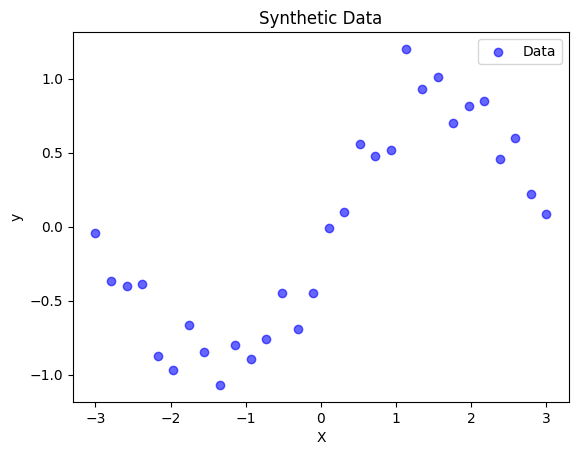

In [15]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data
X = np.linspace(-3, 3, 1000).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the data
plt.scatter(X, y, label="Data", color="blue", alpha=0.6)
plt.title("Synthetic Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Linear Regression Models with Varying Complexity
We'll fit models with increasing polynomial degrees to observe underfitting and overfitting.

In [16]:
# Define a function to plot models
def plot_model(degree, X_train, y_train, X_test, y_test):
    # Transform features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)

    # Plot results
    plt.scatter(X_train, y_train, label="Training Data", color="blue", alpha=0.6)
    plt.scatter(X_test, y_test, label="Test Data", color="green", alpha=0.6)

    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_plot = model.predict(poly.transform(X_plot))
    plt.plot(X_plot, y_plot, label=f"Degree {degree}", color="red")

    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

    # Print errors
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    print(f"Degree {degree} | Training r2: {train_r2:.2f} | Test r2: {test_r2:.2f}")


### Underfitting
A low-degree polynomial (e.g., degree 1) fails to capture the complexity of the data.

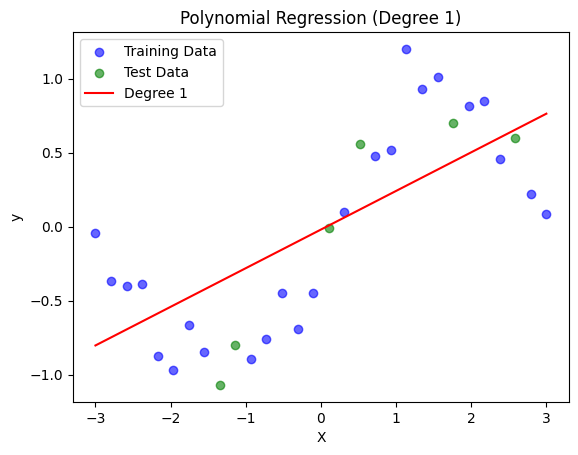

Degree 1 | Training r2: 0.51 | Test r2: 0.66


In [17]:
plot_model(degree=1, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

### Appropriate Fit
A moderately complex model (e.g., degree 5) captures the underlying trend without overfitting.

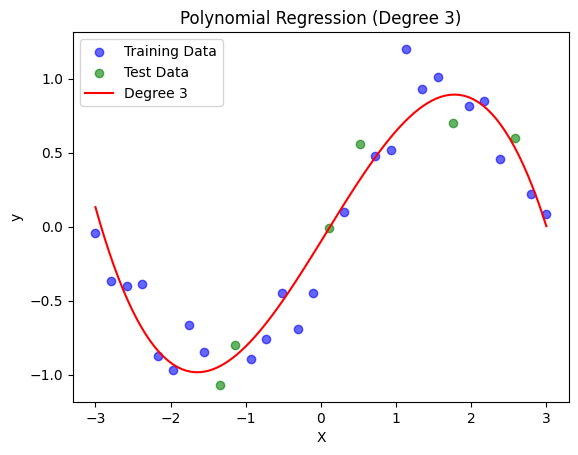

Degree 3 | Training r2: 0.92 | Test r2: 0.96


In [18]:
plot_model(degree=3, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

### Overfitting
A high-degree polynomial (e.g., degree 15) fits the noise in the training data, leading to poor generalization.

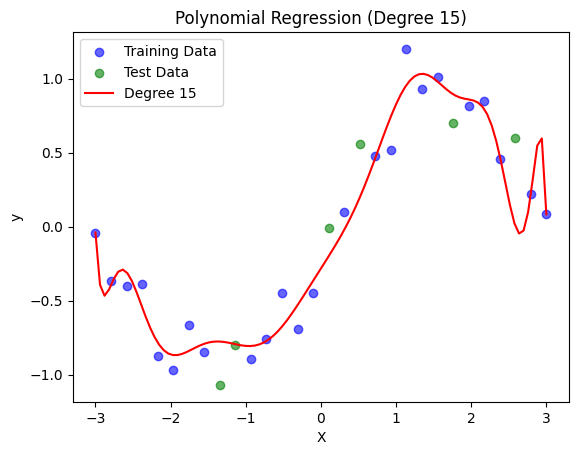

Degree 15 | Training r2: 0.97 | Test r2: 0.78


In [19]:
plot_model(degree=15, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

## Conclusion
- **Underfitting** occurs when the model is too simple to capture the data's complexity (e.g., degree 1).
- **Overfitting** happens when the model is too complex and fits the noise in the training data (e.g., degree 15).
- A model with an appropriate complexity (e.g., degree 5) balances bias and variance, providing the best generalization performance.